# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [2]:
#usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


Basic Regression Diagnostics!
--------------------
Slope: 0.5575757575757568
Y-Intercept: 6.3333333333333375
R-Squared: 0.9715335169880626
--------------------
Model: Y = 0.5575757575757568 * X + 6.3333333333333375


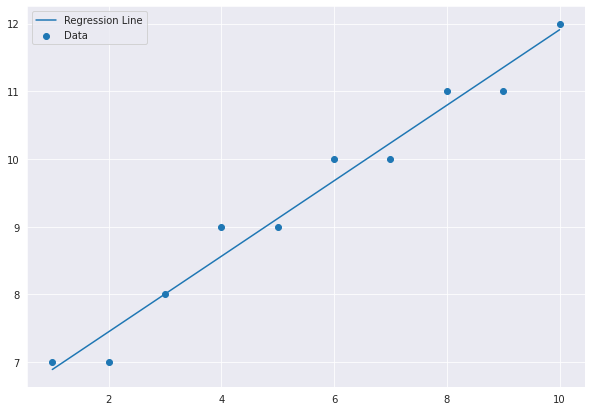

In [9]:
def calc_slope(xs,ys):
    
    return ((X.mean()*Y.mean() - (X*Y).mean())/((X.mean())**2 - (X**2).mean()))

def best_fit(xs,ys):
    
    m = calc_slope(xs, ys)
    #y = mx + c => c = y-mx
    c = ys.mean() - m * xs.mean()
    return (m, c)

m, c = best_fit(X, Y)

def reg_line (m, c, xs):
    
    ys = np.zeros(len(xs), dtype=np.float64)
    
    for i in range(len(xs)):
        ys[i] = m * xs[i] + c
    return ys
y_pred = reg_line(m, c, X)


def sq_err(y_real, y_predicted):
    """
    input
    y_real : true y values
    y_predicted : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    if len(y_real) != len(y_predicted):
        return "Error"
    else:
        sq_e = 0
        for r, p in zip(y_real, y_predicted):
            sq_e += (r-p)**2
    return sq_e

def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    if len(y_real) != len(y_predicted):
        return "Error"
    else:
        y_bar = y_real.mean()
        y_mean = np.zeros(len(y_real))
        y_mean += y_bar
        
        ssr = sq_err(y_real, y_predicted)
        sst = sq_err(y_real, y_mean)
        #print(sst, y_real.var()*len(y_real))
        r_squared = 1-ssr/sst
        return r_squared
    
r_sq = r_squared(Y, y_pred)

print("Basic Regression Diagnostics!")
print("-"*20)
print("Slope:", m)
print("Y-Intercept:", c)
print("R-Squared:",r_sq)
print("-"*20)
print("Model: Y = {} * X + {}".format(m, c))


fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X,Y, label='Data')
ax.plot(X, y_pred, label="Regression Line")
#ax.scatter(x_new, y_pred)
ax.legend()

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


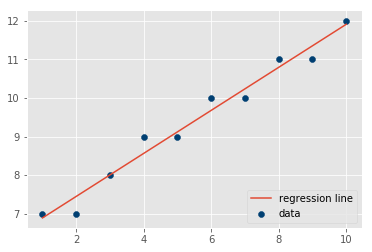

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

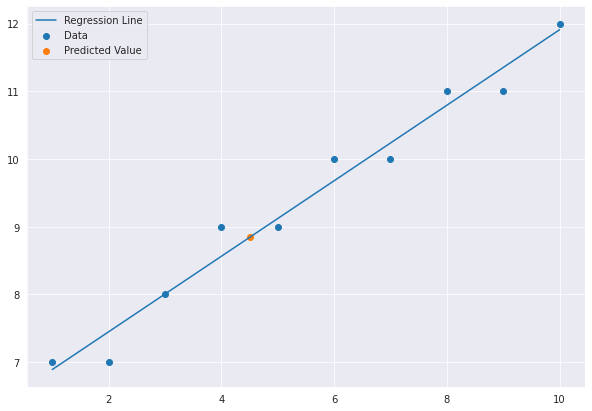

In [12]:
# Make prediction for x = 4.5 and visualize on the scatter plot

x_new = 4.5
y_predicted = m*x_new + c
y_predicted

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X,Y, label='Data')
ax.plot(X, y_pred, label="Regression Line")
ax.scatter(x_new, y_predicted, label='Predicted Value')
ax.legend()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 